# Customer Segmentation
Bu projede bir şirketin, hedeflenen pazarlamaya yardımcı olmak ve satın alma alışkanlıklarını anlamak için müşterilerin sınıflandırılmasını içermektedir.
<br><br>
Veri seti aşağıdaki tablolardan oluşmaktadır: 
* Müşteri
* Ürünler
* Siparişler

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv", encoding='latin-1')

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [5]:
# Tüm satırları boş olan sütunları silelim
miss = pd.DataFrame(df.isnull().sum(), index=None)
alanlar=miss[miss[0]!=4194].index
df=df[alanlar]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 147 entries, Customers.id to Products.saved_status
dtypes: float64(64), int64(10), object(73)
memory usage: 4.7+ MB


In [7]:
# Tarih alanlarını dönüştürelim.

import datetime as dt
today = dt.datetime(2024,1,1)
print(today)

2024-01-01 00:00:00


In [8]:
t=[col for col in df.columns if 'date' in col]
t

['Customers.create_date',
 'Orders.payment_date',
 'Orders.placed_date',
 'Orders.updated_date',
 'Orders.shipped_date']

In [9]:
for col in t:
    df[col] = pd.to_datetime(df[col], unit='s')

In [10]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attribute_names,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Order_Items.flags,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.video,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.seat_size,Products.family_id,Products.saved_status
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,5.7204E+14,3.0,2015-03-10 20:24:59,NaN,authorize.net,NaN,64.29,6993607863,510142,1,2015-03-10 20:24:59,2015-08-06 13:40:10,2015-03-11 19:08:42,NaN,Insured By Eye4Fraud,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",NaN,1,57.20,44.00,NaN,NaN,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,44.00,0.0,NaN,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,NaN,Green,NaN,62.0,B00I6GQE0A,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 

In [11]:
# Tabloları ayıralım

c = [col for col in df.columns if 'Customers.' in col]
o = [col for col in df.columns if 'Orders.' in col]
oi = [col for col in df.columns if 'Order_Items.' in col]
p = [col for col in df.columns if 'Products.' in col]
c,o,oi,p

(['Customers.id',
  'Customers.fname',
  'Customers.lname',
  'Customers.company',
  'Customers.create_date',
  'Customers.status',
  'Customers.mailing',
  'Customers.tax_exempt',
  'Customers.account_id',
  'Customers.last_modified',
  'Customers.customer_type'],
 ['Orders.id',
  'Orders.customer_id',
  'Orders.fname',
  'Orders.lname',
  'Orders.company',
  'Orders.order_number',
  'Orders.reorder_id',
  'Orders.external_source',
  'Orders.external_id',
  'Orders.currency',
  'Orders.subtotal',
  'Orders.tax',
  'Orders.shipping',
  'Orders.coupon_id',
  'Orders.coupon_amount',
  'Orders.fee_name',
  'Orders.fee_amount',
  'Orders.discount_name',
  'Orders.discount_amount',
  'Orders.total',
  'Orders.balance_due',
  'Orders.shipping_carrier',
  'Orders.shipping_method',
  'Orders.weight',
  'Orders.tracking',
  'Orders.payment_status',
  'Orders.payment_date',
  'Orders.payment_user',
  'Orders.payment_type',
  'Orders.payment_method',
  'Orders.payment_amount',
  'Orders.payment_i

In [12]:
# Her bir tablo için bir Data Frame oluşturalım

dfC=df[c]
dfO=df[o]
dfOi=df[oi]
dfP=df[p]

dfC.columns = dfC.columns.str.replace('Customers.', '')
dfO.columns = dfO.columns.str.replace('Orders.', '')
dfOi.columns = dfOi.columns.str.replace('Order_Items.', '')
dfP.columns = dfP.columns.str.replace('Products.', '')

In [13]:
# Tekrar kayıtlar varsa silelim

dfC=dfC.drop_duplicates(subset="id")
dfO=dfO.drop_duplicates(subset="id")
dfOi=dfOi.drop_duplicates(subset="id")
dfP=dfP.drop_duplicates(subset="id")

In [14]:
dfC.head()

,id,fname,lname,company,create_date,status,mailing,tax_exempt,account_id,last_modified,customer_type
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,2013-12-11 16:44:23,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,0.0,NaN,NaN,1437764316,0.0
7,7,peggy,thompson,NaN,2013-12-27 14:52:27,NaN,NaN,NaN,NaN,1437763617,0.0


### Veri Tabanı İşlemleri

In [15]:
import sqlite3
from sqlite3 import Error

In [16]:
conn = sqlite3.connect("customer_data.db")

In [17]:
dfC.to_sql('Customers', con=conn)
dfO.to_sql('Orders', con=conn)
dfOi.to_sql('OrderItems', con=conn)
dfP.to_sql('Products', con=conn)

-1

In [18]:
conn.execute("SELECT * FROM Customers").fetchall()

[(0,
  797,
  'Christy',
  'Dill',
  'Company0',
  '2015-03-10 20:18:44',
  None,
  None,
  None,
  None,
  1437764306,
  0.0),
 (1,
  3,
  'John',
  'Smith',
  'Company1',
  '2013-12-03 16:45:39',
  None,
  None,
  None,
  None,
  1437764354,
  0.0),
 (3,
  4,
  'James',
  'Anderson',
  None,
  '2013-12-11 16:44:23',
  None,
  None,
  None,
  None,
  1437762646,
  0.0),
 (4,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  '2013-12-12 15:19:59',
  0.0,
  0.0,
  None,
  None,
  1437764316,
  0.0),
 (7,
  7,
  'peggy ',
  'thompson',
  None,
  '2013-12-27 14:52:27',
  None,
  None,
  None,
  None,
  1437763617,
  0.0),
 (8,
  8,
  'Randy',
  'Pruss',
  None,
  '2014-01-09 21:33:36',
  None,
  None,
  None,
  None,
  1437763421,
  0.0),
 (9,
  10,
  'Tommy ',
  'Smith',
  None,
  '2014-01-23 20:38:36',
  None,
  None,
  None,
  None,
  1437763553,
  0.0),
 (10,
  11,
  'Mark',
  'Tremble',
  None,
  '2014-01-24 14:19:15',
  None,
  None,
  None,
  None,
  1437763644,
  0.0),
 (11,
  12,
  '

In [19]:
sql = """
SELECT
    c.id AS CustomerID,
    c.fname AS FirstName,
    c.lname AS LastName,
    c.company AS Company,
    c.create_date AS CustomerCreateDate,
    c.status AS CustomerStatus,
    o.order_number AS OrderNumber,
    o.placed_date AS OrderPlacedDate,
    o.currency AS OrderCurrency,
    o.subtotal AS OrderSubtotal,
    o.tax AS OrderTax,
    o.total AS OrderTotal
FROM
    Customers c
    INNER JOIN Orders o ON c.id = o.customer_id
"""

# SQL sorgusunu çalıştırarak verileri DataFrame'e aktarın
dfRFM = pd.read_sql_query(sql, conn)

In [20]:
dfRFM.head()

,CustomerID,FirstName,LastName,Company,CustomerCreateDate,CustomerStatus,OrderNumber,OrderPlacedDate,OrderCurrency,OrderSubtotal,OrderTax,OrderTotal
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,NaN,3758,2015-03-10 20:24:59,USD,57.20,0.0,64.29
1,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,23,2013-12-03 17:07:35,USD,20.00,NaN,29.99
2,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,9531,2015-12-08 19:40:52,USD,68.78,0.0,78.73
3,4,James,Anderson,None,2013-12-11 16:44:23,NaN,29,2013-12-11 16:44:23,USD,19.56,0.0,29.55
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,1658,2014-09-10 15:40:55,USD,14.63,NaN,24.58


### RFM Tablosu

In [52]:
# Bugüne kadar olan zaman fazla çıkacağı için tablodaki en son tarihi baz alabiliriz.

now = latest_date = dfRFM['OrderPlacedDate'].max() + pd.DateOffset(days=1)
now

Timestamp('2016-05-17 17:14:39')

In [53]:
dfRFM['OrderPlacedDate'] = pd.to_datetime(dfRFM['OrderPlacedDate'])

recency = (now - dfRFM.groupby('CustomerID')['OrderPlacedDate'].max()).dt.days
frequency = dfRFM.groupby('CustomerID')['OrderNumber'].count()
monetary = dfRFM.groupby('CustomerID')['OrderTotal'].sum()

rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

print(rfm_df)

            Recency  Frequency  Monetary
CustomerID                              
3               160          2    108.72
4               888          1     29.55
5               615          3    124.99
7               872          1     49.14
8               858          1     69.70
...             ...        ...       ...
3730              1          1     16.06
3732              1          1     39.99
3733              1          1    989.10
3735              1          1    129.99
3736              1          1     24.54

[3054 rows x 3 columns]


### Clustering

In [63]:
from yellowbrick.cluster import KElbowVisualizer

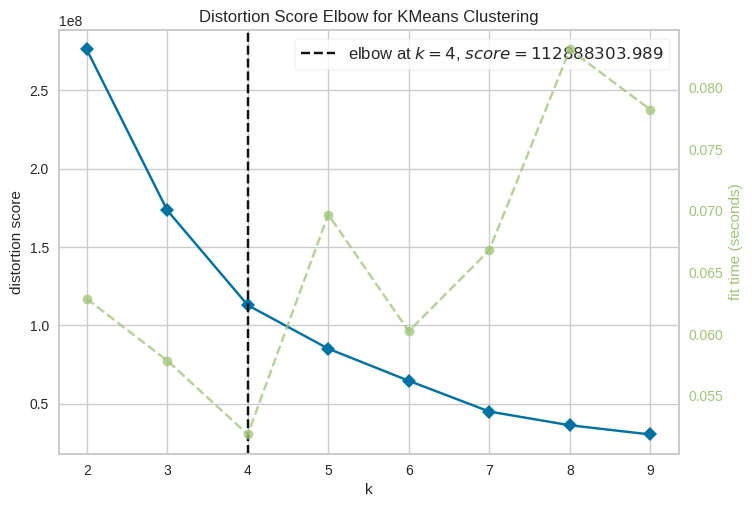

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
km=KMeans()
vis=KElbowVisualizer(km, k=(2,10))
vis.fit(rfm_df)
vis.show()

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [66]:
model=KMeans(n_clusters=4)
model=model.fit(rfm_df)

In [67]:
pred=model.predict(rfm_df)

In [68]:
rfm_df['cluster']=pred

In [69]:
silhouette_score(rfm_df,pred)

0.5639767812285592

In [70]:
rfm_df.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
3,160,2,108.72,0
4,888,1,29.55,3
5,615,3,124.99,3
7,872,1,49.14,3
8,858,1,69.70,3


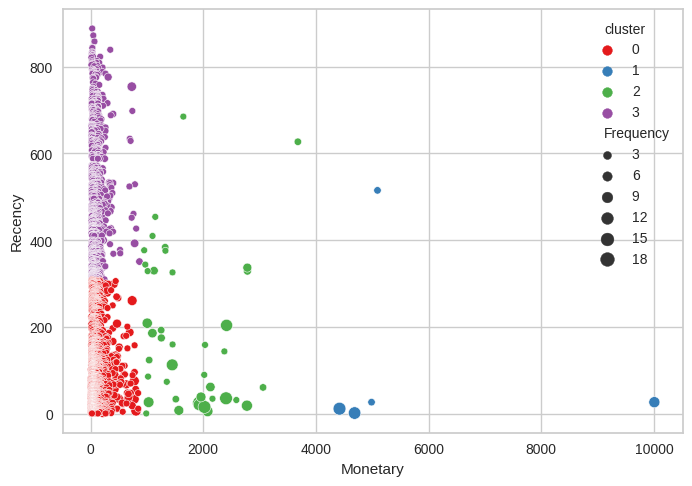

In [71]:
import seaborn as sns
sns.scatterplot(x=rfm_df['Monetary'], y=rfm_df['Recency'], hue=rfm_df['cluster'], size=rfm_df['Frequency'], palette='Set1');

## Sonuç

Özelliklerine göre müşteri sınıflandırılması amacıyla geliştirilen kümeleme modeli sonrasında müşterilerin en uygun 4 gruba ayrıldığı görülmüştür.